# Practice Math under linear and logistic regression loss and gradient

## Generate some basic linear and logistic data

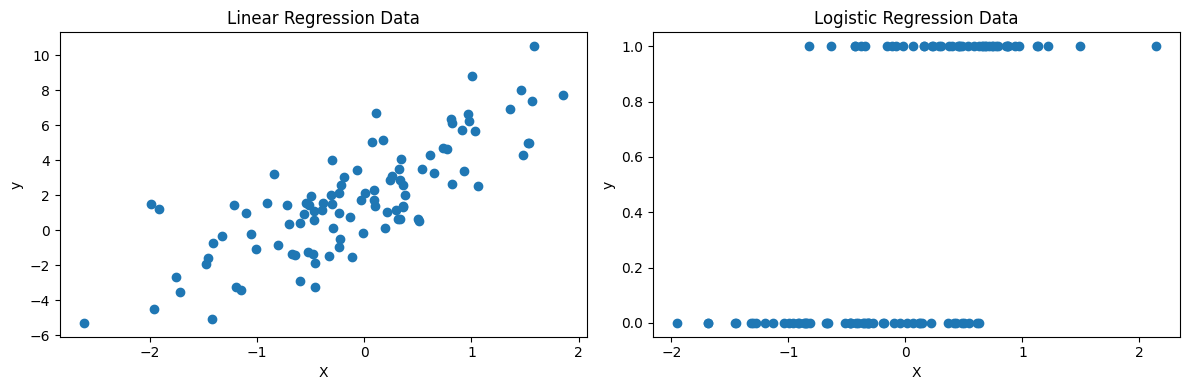

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from mlpeople.models.linear import generate_linear_regression_data
from mlpeople.models.logistic import generate_logistic_regression_data
from mlpeople.math.linear_numeric import add_bias_column

theta1_linear = 3.0
theta0_linear = 2.0

theta1_logistic = 3.0
theta0_logistic = 0.0

# Generate linear data
X_linear, y_linear, beta_linear_true = generate_linear_regression_data(
    n=100, p=1, coefs=[theta1_linear], intercept=theta0_linear, sigma=2, seed=42
)

# Generate logistic data
X_logistic, y_logistic, _ = generate_logistic_regression_data(
    n=100, p=1, coefs=[theta1_logistic], intercept=theta0_logistic,  sigma=2, seed=42
)

# X_linear = add_bias_column(X_linear)

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].scatter(X_linear, y_linear)
axes[0].set_title("Linear Regression Data")
axes[0].set_xlabel("X")
axes[0].set_ylabel("y")

axes[1].scatter(X_logistic, y_logistic)
axes[1].set_title("Logistic Regression Data")
axes[1].set_xlabel("X")
axes[1].set_ylabel("y")

plt.tight_layout()
plt.show()

## Theta1 vs loss vs gradient experiments

In [2]:
from mlpeople.visualization.optimization import plot_loss_and_grad_vs_theta1

### Linear data & Linear regression

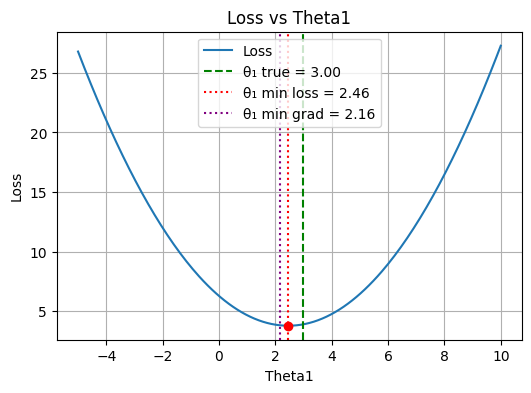

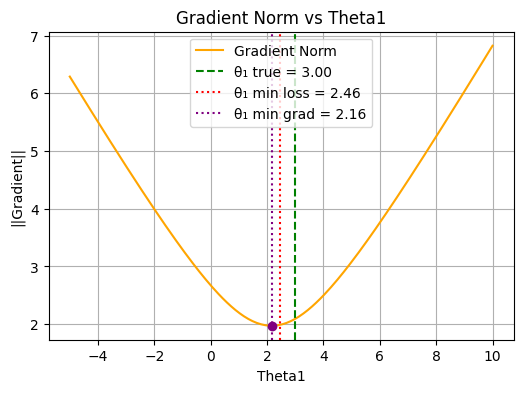

In [3]:
plot_loss_and_grad_vs_theta1(X_linear, y_linear, theta1_true=theta1_linear, theta1_values=np.linspace(-5, 10, 200));

In [4]:
from mlpeople.optimization.experiments import run_linear_regression_theta1_analysis

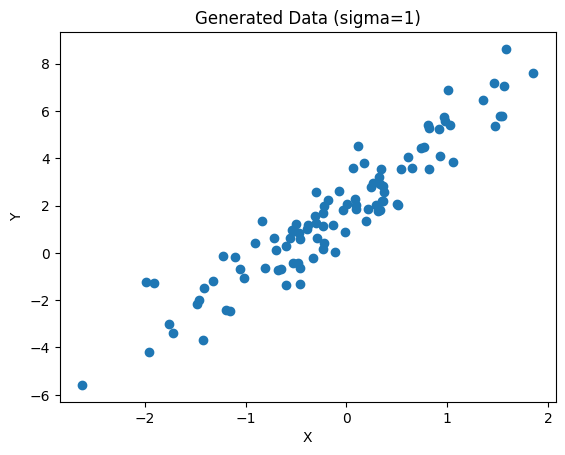

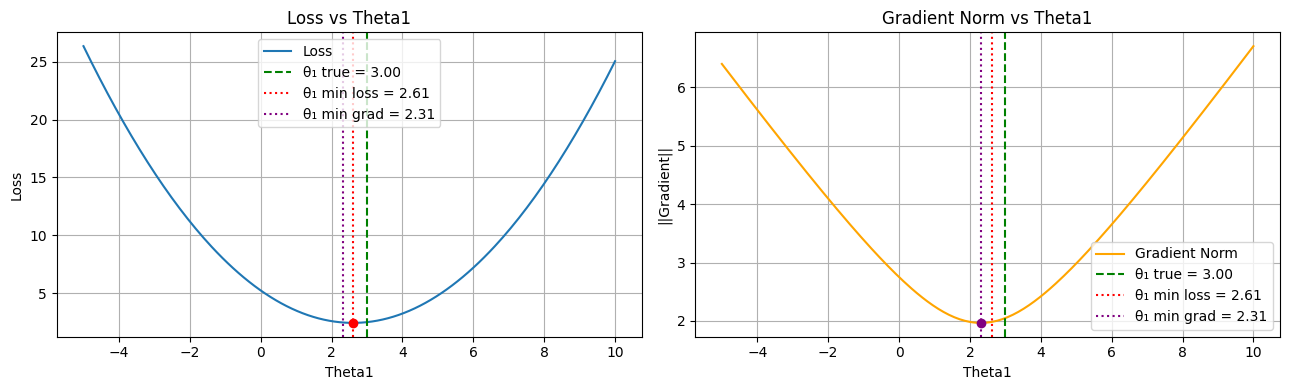

In [5]:
run_linear_regression_theta1_analysis(
    theta0=theta0_linear,
    theta1=theta1_linear,
    theta1_values=np.linspace(-5, 10, 200),
    subplots=True
);

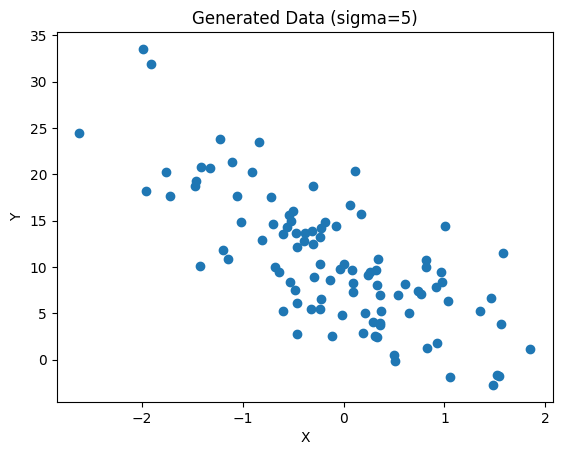

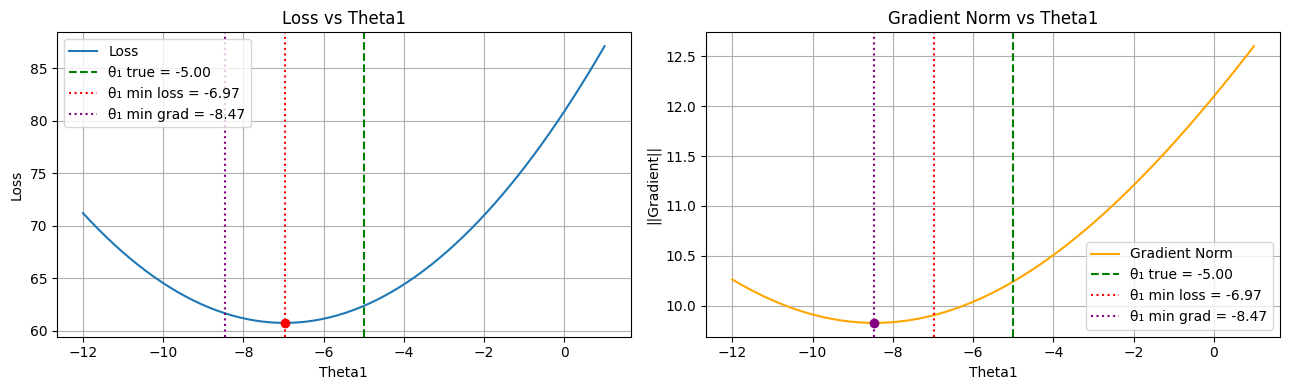

In [6]:

run_linear_regression_theta1_analysis(
    theta0=10,
    theta1=-5,
    sigma=5,
    theta1_values=np.linspace(-12, 1, 200),
    subplots=True
);

### Logistic data & logistic regression

In [7]:
from mlpeople.models.logistic import generate_logistic_regression_data
from mlpeople.optimization.experiments import run_logistic_regression_theta1_analysis


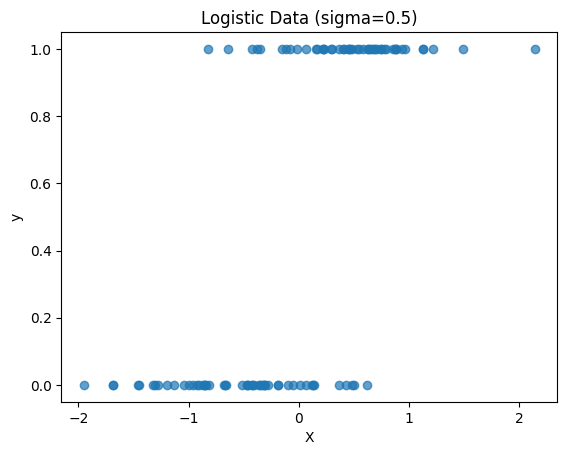

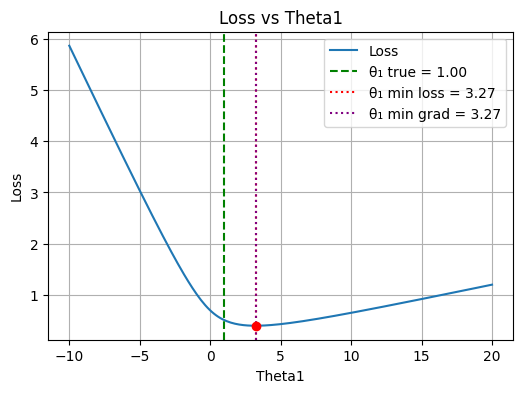

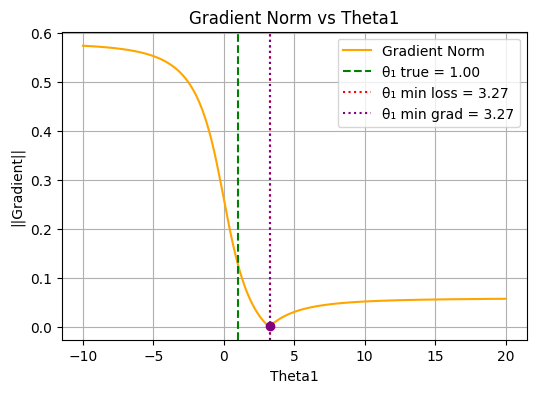

In [8]:
run_logistic_regression_theta1_analysis(sigma=0.5, theta1_values=np.linspace(-10, 20, 200));

### Logistic data & linear regression

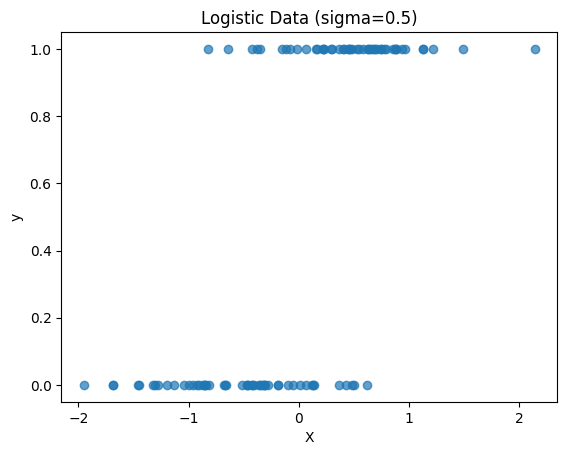

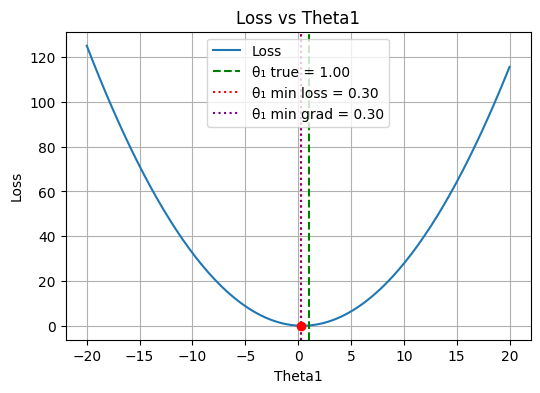

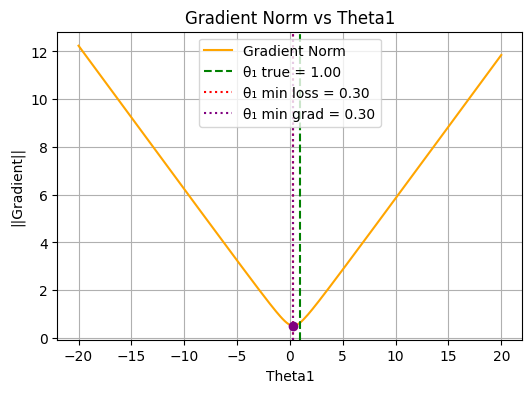

In [9]:
# use linear model and mse loss for logistic
run_logistic_regression_theta1_analysis(
    sigma=0.5,
    theta1_values=np.linspace(-20, 20, 200),
    predict_fn=lambda theta, X: X @ theta,
    loss_fn=lambda y_true, y_pred: np.sum((y_pred - y_true)**2) / (2 * len(y_true)),
    grad_fn=lambda theta, X, y: (X.T @ ((X @ theta) - y)) / X.shape[0],
);

### More experiments with logistic data. Compare logistic vs linear

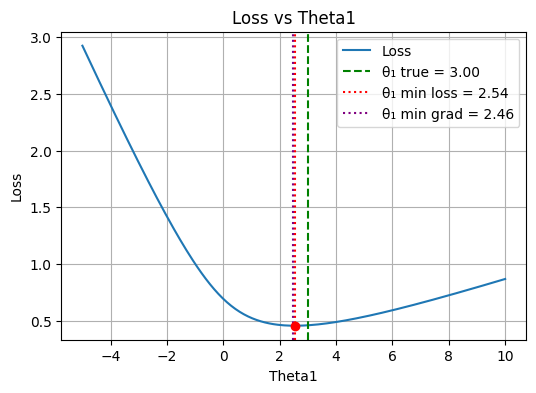

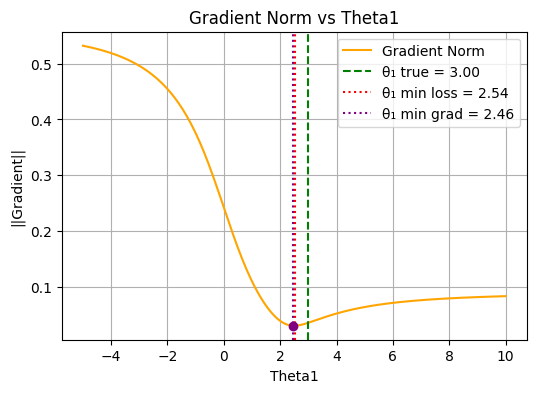

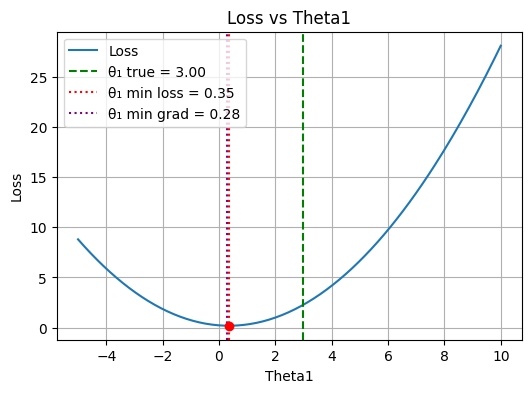

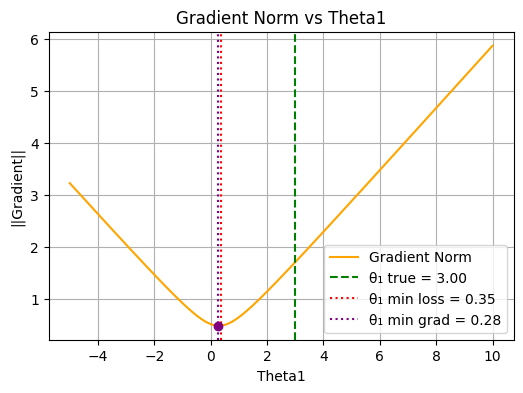

In [10]:
# use log loss and corresponding gradient, use sigmoid for prediction
plot_loss_and_grad_vs_theta1(
    X_logistic,
    y_logistic,
    theta1_true=theta1_logistic,
    theta1_values=np.linspace(-5, 10, 200),
    predict_fn=lambda theta, X: 1 / (1 + np.exp(-(X @ theta))),
    loss_fn=lambda y, y_hat: -np.mean(
        y * np.log(np.clip(y_hat, 1e-15, 1 - 1e-15)) +
        (1 - y) * np.log(np.clip(1 - y_hat, 1e-15, 1))
    ),
    grad_fn=lambda theta, X, y: (X.T @ ((1 / (1 + np.exp(-(X @ theta)))) - y)) / X.shape[0],
)

# use mse loss and corresponding gradient, use linear model for prediction
plot_loss_and_grad_vs_theta1(
    X_logistic,
    y_logistic,
    theta1_true=theta1_logistic,
    theta1_values=np.linspace(-5, 10, 200),
    # predict_fn=lambda theta, X: 1 / (1 + np.exp(-(X @ theta))),
    # loss_fn=lambda y, y_hat: -np.mean(
    #     y * np.log(np.clip(y_hat, 1e-15, 1 - 1e-15)) +
    #     (1 - y) * np.log(np.clip(1 - y_hat, 1e-15, 1))
    # ),
    # grad_fn=lambda theta, X, y: (X.T @ ((1 / (1 + np.exp(-(X @ theta)))) - y)) / X.shape[0],
);

### More spread logistic data with few outlier

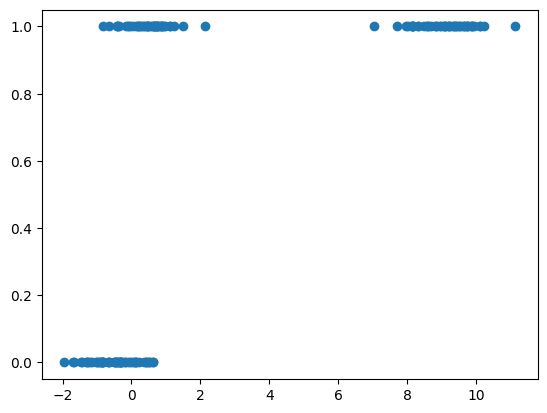

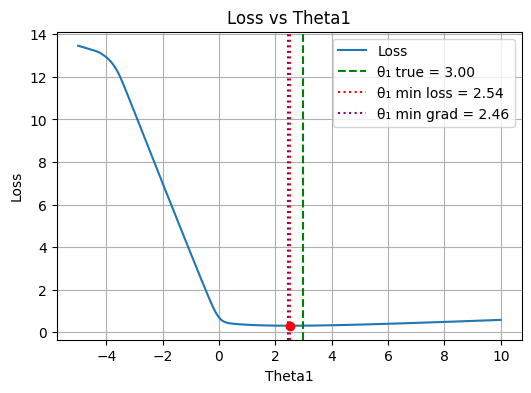

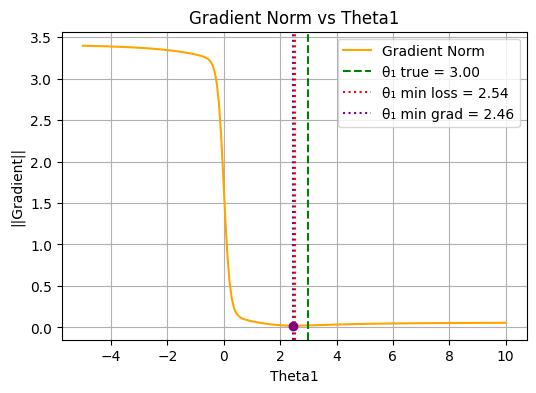

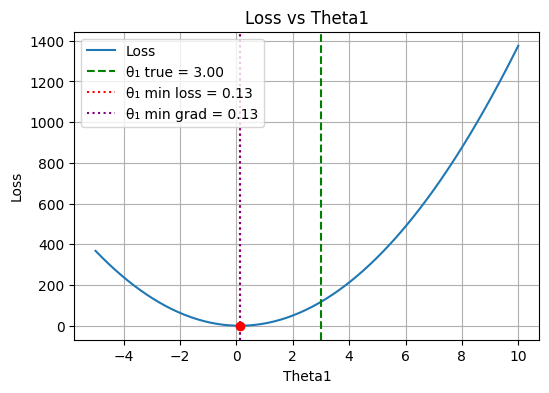

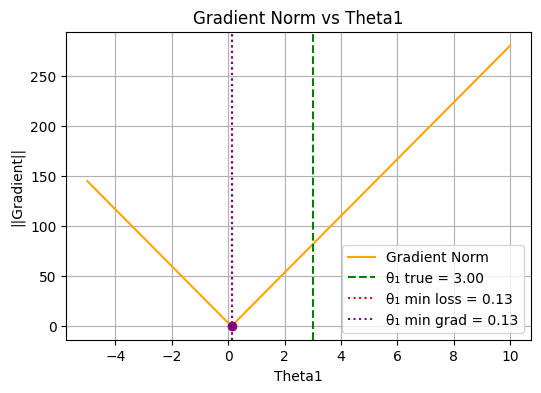

In [11]:
# Generate more logistic data with all 1 far right
X_logistic_extreme, y_logistic_extreme, _ = generate_logistic_regression_data(
    n=50, p=1, coefs=[theta1_logistic], intercept=10,  sigma=2, seed=42
)
X_logistic_extreme = X_logistic_extreme + 9

# X_logistic_extreme = np.array([[3], [3.5], [3.9], [5], [5], [5.2], [5.3]])  # far right
X_logistic_outliers = np.vstack([X_logistic, X_logistic_extreme])

# y_logistic_extreme = np.array([1, 1, 1, 1, 1, 1, 1])
y_logistic_outliers = np.concatenate([
    y_logistic,
    y_logistic_extreme
])

plt.scatter(X_logistic_outliers, y_logistic_outliers)

# use log loss and corresponding gradient, use sigmoid for prediction
plot_loss_and_grad_vs_theta1(
    X_logistic_outliers,
    y_logistic_outliers,
    theta1_true=theta1_logistic,
    theta1_values=np.linspace(-5, 10, 200),
    predict_fn=lambda theta, X: 1 / (1 + np.exp(-(X @ theta))),
    loss_fn=lambda y, y_hat: -np.mean(
        y * np.log(np.clip(y_hat, 1e-15, 1 - 1e-15)) +
        (1 - y) * np.log(np.clip(1 - y_hat, 1e-15, 1))
    ),
    grad_fn=lambda theta, X, y: (X.T @ ((1 / (1 + np.exp(-(X @ theta)))) - y)) / X.shape[0],
)

# use mse loss and corresponding gradient, use linear model for prediction
plot_loss_and_grad_vs_theta1(
    X_logistic_outliers,
    y_logistic_outliers,
    theta1_true=theta1_logistic,
    theta1_values=np.linspace(-5, 10, 200),
    # predict_fn=lambda theta, X: 1 / (1 + np.exp(-(X @ theta))),
    # loss_fn=lambda y, y_hat: -np.mean(
    #     y * np.log(np.clip(y_hat, 1e-15, 1 - 1e-15)) +
    #     (1 - y) * np.log(np.clip(1 - y_hat, 1e-15, 1))
    # ),
    # grad_fn=lambda theta, X, y: (X.T @ ((1 / (1 + np.exp(-(X @ theta)))) - y)) / X.shape[0],
);

### Compare on same plot

In [15]:
from mlpeople.visualization.optimization import compare_losses_vs_theta1
from mlpeople.optimization.analysis import mse_loss_linear, grad_norm_mse_linear

#### Logistic mse vs log-loss

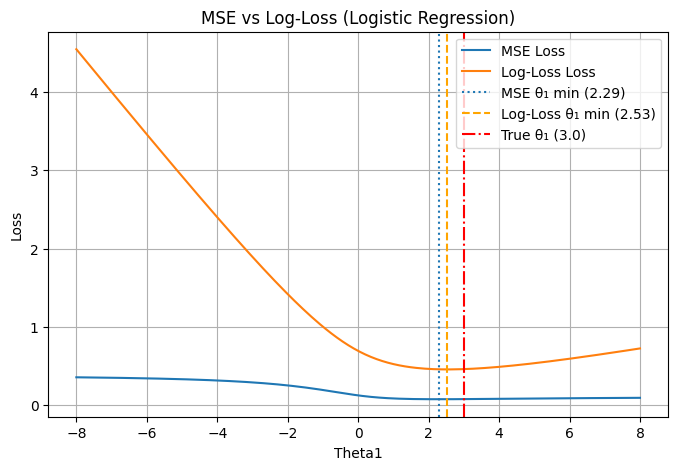

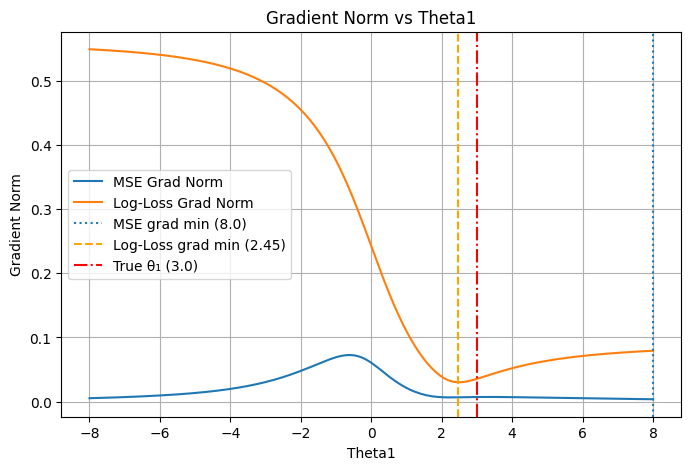

In [16]:
compare_losses_vs_theta1(
    X_logistic, y_logistic,
    theta1_true=theta1_logistic,
    theta1_values=np.linspace(-8, 8, 200)
);

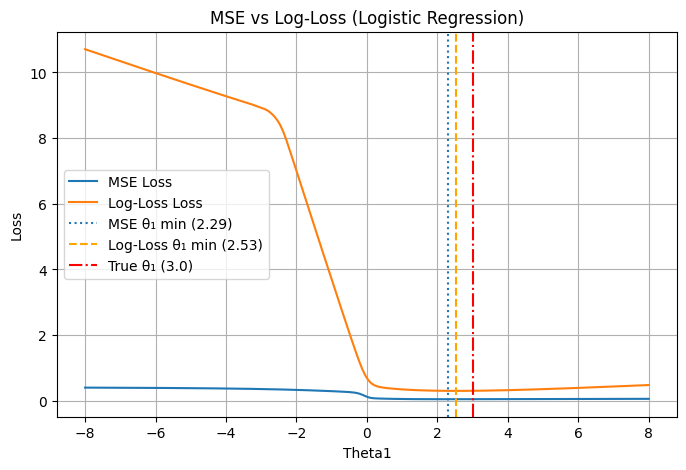

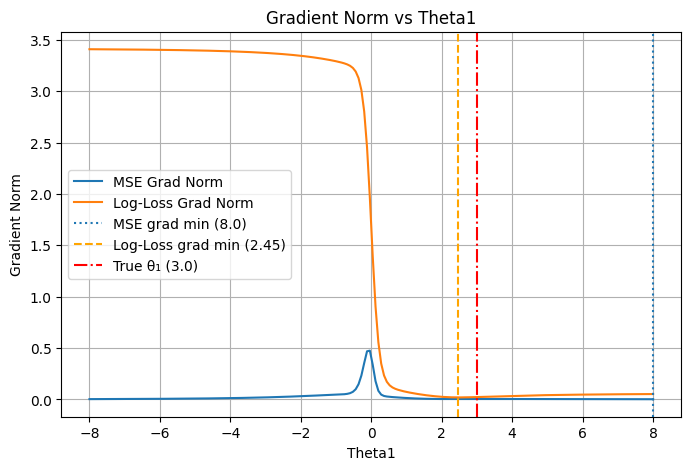

In [17]:
compare_losses_vs_theta1(
    X_logistic_outliers, y_logistic_outliers,
    theta1_true=theta1_logistic,
    theta1_values=np.linspace(-8, 8, 200)
);

#### Linear mse vs Logistic log-loss

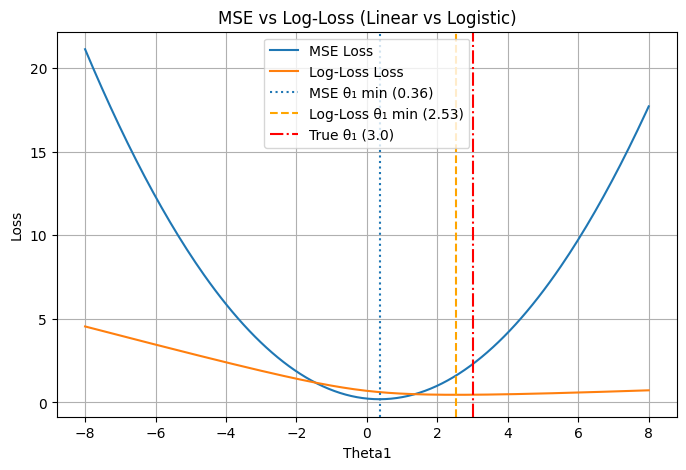

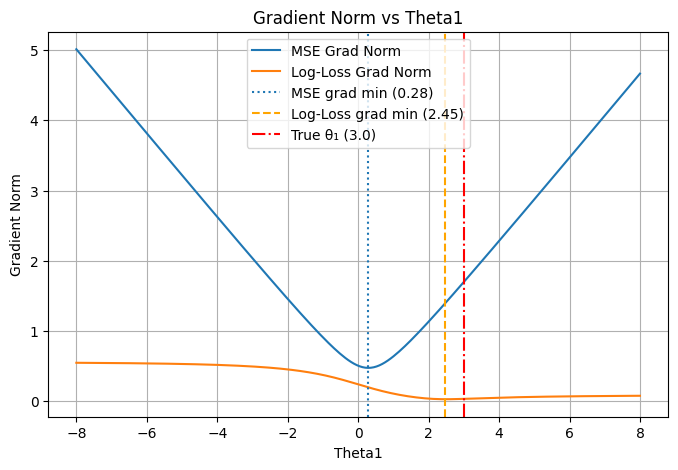

In [18]:
compare_losses_vs_theta1(
    X_logistic, y_logistic,
    theta1_true=theta1_logistic,
    loss1_fn=mse_loss_linear,
    grad1_fn=grad_norm_mse_linear,
    theta1_values=np.linspace(-8, 8, 200),
    title="Linear vs Logistic"
);

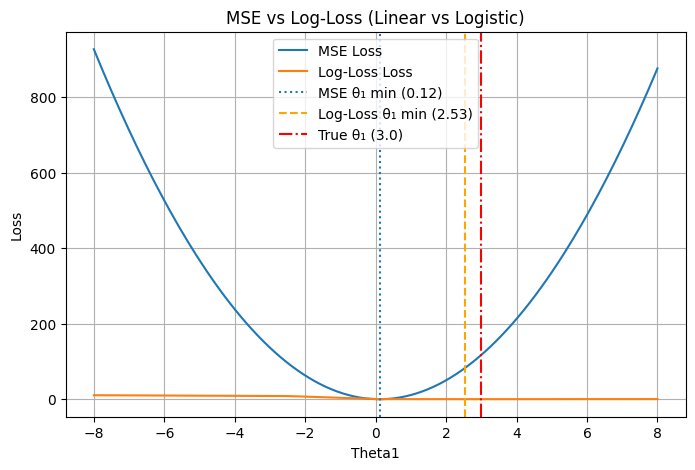

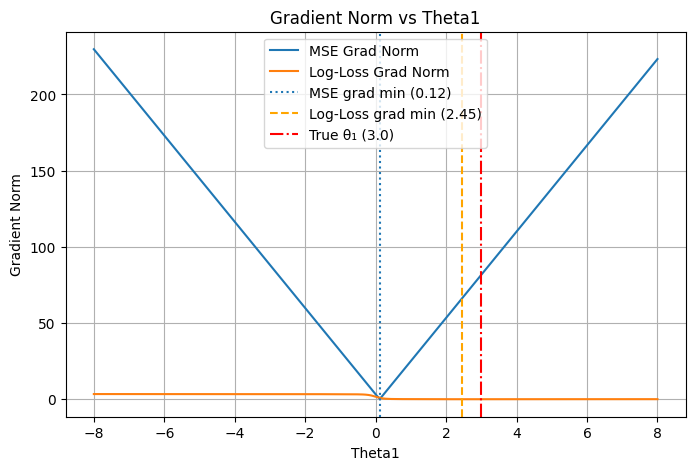

In [19]:
compare_losses_vs_theta1(
    X_logistic_outliers, y_logistic_outliers,
    theta1_true=theta1_logistic,
    loss1_fn=mse_loss_linear,
    grad1_fn=grad_norm_mse_linear,
    theta1_values=np.linspace(-8, 8, 200),
    title="Linear vs Logistic"
);